# LSTM: Implementation From Scratch

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from Utils import *
from LSTM import *

# Data Preprocessing

1.  **Tokenization**: To break down the raw text into individual words or units (tokens).

2.  **Vocabulary Construction**: To establish a defined set of known words, filtering out infrequent ones and adding a special token (`<UNK>`) for unknown words encountered later.

3.  **Indexing**: To assign a unique numerical ID to every word in the vocabulary for computational use.

4.  **Sequence Generation**: To transform the text into sequences of numerical IDs and create corresponding input ($X$) and target ($Y$) sequences needed for training the model to predict the next word.

5.  **Numerical Representation (One-Hot Encoding)**: To convert each word's numerical ID into a sparse vector format ($[0, ..., 1, ..., 0]$) suitable as input for the neural network.

In [55]:
# Prepare Data
corpus_text = """
Recurrent Neural Networks, or RNNs, are a type of artificial neural network designed to recognize patterns in sequences of data, such as text, genomes, handwriting, the spoken word, or numerical times series data.
Unlike feedforward neural networks, RNNs use their internal state (memory) to process sequences of inputs. This makes them applicable to tasks such as unsegmented, connected handwriting recognition or speech recognition.
The term Recurrent Neural Network is used generically to refer to two broad classes of networks with a similar general structure, where one is finite impulse and the other is infinite impulse. Both classes of networks exhibit temporal dynamic behavior. A finite impulse recurrent network is a directed acyclic graph that can be unrolled and replaced with a strictly feedforward neural network, while an infinite impulse recurrent network is a directed cyclic graph that cannot be unrolled.
"""

# Prepare word-level data
X_one_hot_data, Y_data, word_to_ix, ix_to_word, vocab_size = prepare_word_data_onehot(
    corpus_text,
    vocab_threshold=1
)
if not X_one_hot_data: sys.exit("Data preparation failed.")

Preparing word data (one-hot inputs)...
Total words found: 140
Vocabulary size (threshold>=1): 85
Using entire text as one sequence.
Prepared 1 training sequence(s).


# LSTM Implementation

In [56]:
# Define Model Hyperparameters
hidden_dim = 50
learning_rate = 0.01
epochs = 1000
clip_value = 5
print_every = 50

In [57]:
# Instantiate Model
LSTM_model = LSTM(hidden_dim=hidden_dim, vocab_size=vocab_size)

# Set word mappings
LSTM_model.word_to_ix = word_to_ix
LSTM_model.ix_to_word = ix_to_word

Starting training (One-Hot Input) for 1000 epochs...
Learning rate: 0.01, Clipping: 5
Epoch 50/1000, Loss: 4.1868, Time: 0.03s

Generated examples:
  their a a a a a a a a a a
  exhibit a a a a a a a a a a
  recognize a a a a a a a a a a

Epoch 100/1000, Loss: 3.8870, Time: 0.02s

Generated examples:
  where neural network is a a a a a a a
  both of of networks of networks a a a a a
  generically to of of networks of networks of networks a a

Epoch 150/1000, Loss: 2.8755, Time: 0.03s

Generated examples:
  generically to to of of of networks networks networks with a
  patterns of networks networks networks with a a a neural neural
  broad of networks networks networks with a a a neural neural

Epoch 200/1000, Loss: 1.1531, Time: 0.03s

Generated examples:
  replaced to to of of networks this them them to to
  type of networks networks a a finite impulse recurrent network is
  rnns to sequences of of data as text handwriting handwriting the

Epoch 250/1000, Loss: 0.6066, Time: 0.02s

Ge

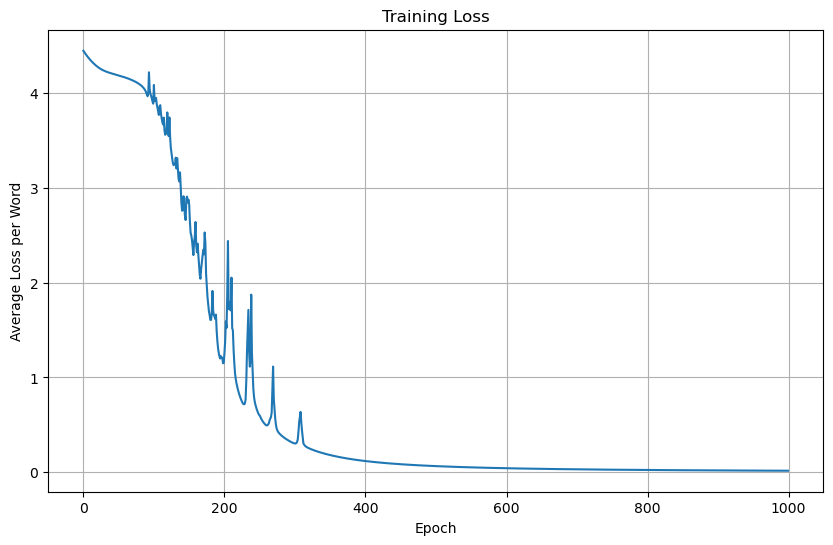

In [58]:
# Train Model
loss_history = LSTM_model.train(
    X_one_hot_data, 
    Y_data,
    lr=learning_rate,
    epochs=epochs,
    clip_value=clip_value,
    print_every=print_every,
    generated_examples=3  # Show 3 examples per reporting interval
)

# Plot Loss
if loss_history:
    plt.figure(figsize=(10, 6))
    plt.plot(loss_history)
    plt.xlabel("Epoch")
    plt.ylabel("Average Loss per Word")
    plt.title("Training Loss")
    plt.grid(True)
    plt.show()

## Evaluation Metrics

1.  **Average Cross-Entropy Loss**: This is the primary quantitative metric tracked during training. It measures how well the model's predicted probability distributions align with the actual target words. Lower loss indicates better performance.

2.  **Text Generation**: The `sample_words` and `predict_words` functions allow for qualitative assessment by generating text sequences based on the trained model. Observing the coherence, grammar, and relevance of the generated text provides insight into the model's language modeling capabilities. Sampling strategies like 'random' (multinomial sampling) or 'argmax' (greedy selection) can be used.

In [61]:
# Evaluate by Sampling (Using the word-specific predict method)
print("\n--- Sampling from the trained model ---")
seed_word = "Recurrent"
sample_length = 10

print(f"\nSampling (random choice) starting with '{seed_word}':")
sampled_text_random = LSTM_model.predict_words(seed_word, n=sample_length, sample_strategy='random')
print(f"{sampled_text_random}")

print(f"\nSampling (argmax choice) starting with '{seed_word}':")
sampled_text_argmax = LSTM_model.predict_words(seed_word, n=sample_length, sample_strategy='argmax')
print(f"{sampled_text_argmax}")


--- Sampling from the trained model ---

Sampling (random choice) starting with 'Recurrent':
recurrent neural or or rnns are a type of artificial neural

Sampling (argmax choice) starting with 'Recurrent':
recurrent networks or rnns are a type of artificial neural network
